#### Mean/Median imputation
**Advantage**
1. simple

**Disadvantage**
1. Distribution of shape
2. Outliers form
3. Covariance and Corelation Change


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [6]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 2)

In [9]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [10]:
x_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [17]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [19]:
x_train['Age_median'] = x_train['Age'].fillna(median_age)
x_train['Age_mean'] = x_train['Age'].fillna(mean_age)

x_train['Fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['fare_mean']= x_train['Fare'].fillna(mean_fare)

In [21]:
x_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,fare_mean
831,0.83,NaN,2,0.83,0.83,14.4583,32.617597
713,29.00,9.4833,0,29.00,29.00,9.4833,9.483300
175,18.00,7.8542,2,18.00,18.00,7.8542,7.854200
21,34.00,13.0000,0,34.00,34.00,13.0000,13.000000
43,3.00,41.5792,3,3.00,3.00,41.5792,41.579200


In [23]:
print('Original Age variance:', x_train['Age'].var())
print('Median Imputation age',x_train['Age_median'].var() )
print('Mean Age imputation',x_train['Age_mean'].var())

print('Original Fare variable varicance', x_train['Fare'].var())
print('median Fare imputation', x_train['Fare_median'].var())
print('Mean fare imputation', x_train['fare_mean'].var())

Original Age variance: 204.34951339046142
Median Imputation age 161.98956633460548
Mean Age imputation 161.81262452718676
Original Fare variable varicance 2448.1979137063163
median Fare imputation 2340.09102197536
Mean fare imputation 2324.2385256705534


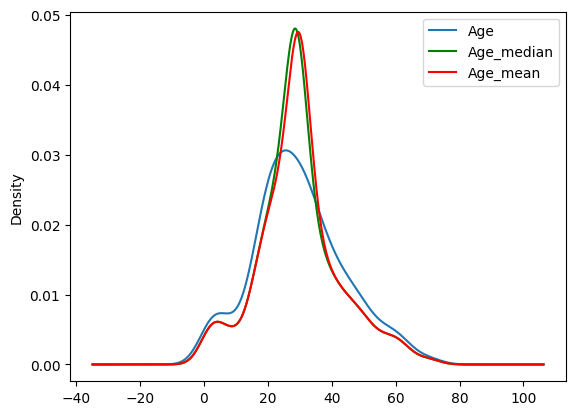

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
# Original variable distribution
x_train['Age'].plot(kind ='kde', ax= ax)

#  Variable imputed with  the median
x_train['Age_median'].plot(kind = 'kde', ax= ax, color= 'green')
#  Variable imputed with  the mean
x_train['Age_mean'].plot(kind = 'kde', ax= ax, color= 'red')
# add legends
line, labels = ax.get_legend_handles_labels()
ax.legend(line, labels, loc = 'best')

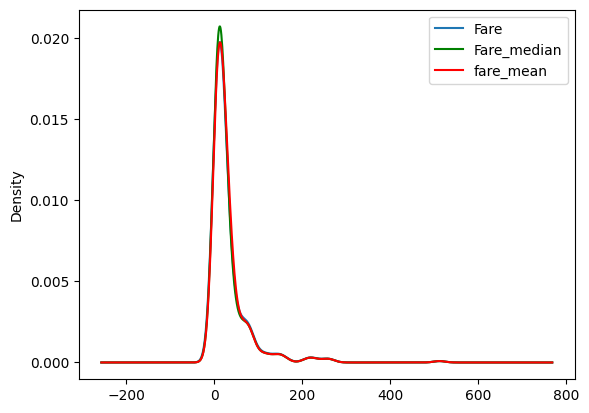

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)           
# Original variable distribution
x_train['Fare'].plot(kind ='kde', ax= ax)       
#  Variable imputed with  the median
x_train['Fare_median'].plot(kind = 'kde', ax= ax, color= 'green')
#  Variable imputed with  the mean      
x_train['fare_mean'].plot(kind = 'kde', ax= ax, color= 'red')
# add legends
line, labels = ax.get_legend_handles_labels()   
ax.legend(line, labels, loc = 'best')
plt.show()


In [31]:
x_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [32]:
x_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
Fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

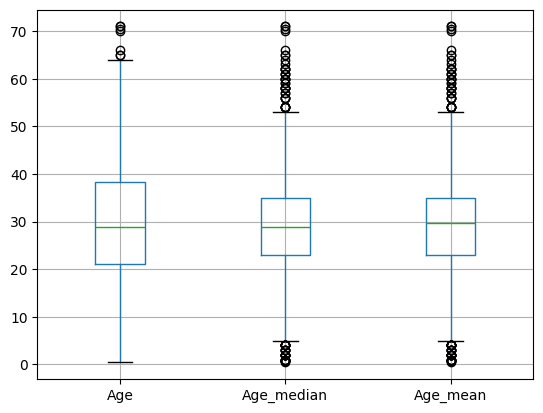

In [34]:
x_train[['Age', 'Age_median', 'Age_mean']].boxplot()

<Axes: >

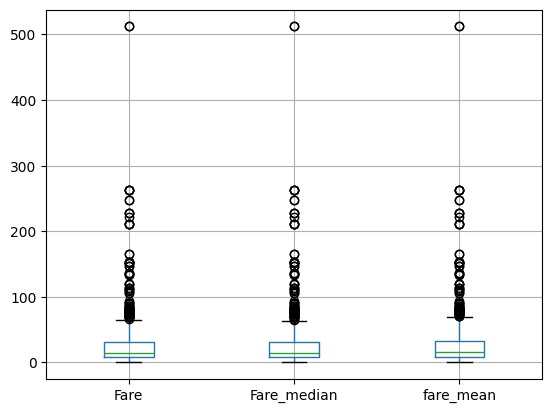

In [35]:
x_train[['Fare', 'Fare_median', 'fare_mean']].boxplot()

#### Using Sklearn

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 2 )

In [37]:
imputer1 = SimpleImputer(strategy= 'median')
imputer2 = SimpleImputer(strategy= 'mean')

In [39]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder= 'passthrough')

In [40]:
trf.fit(x_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [41]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [42]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [43]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [44]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]], shape=(712, 3))